<a href="https://colab.research.google.com/github/shibinAI/Deep-Learning/blob/main/GAN_using_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading and plotting cifar10 dataset  

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


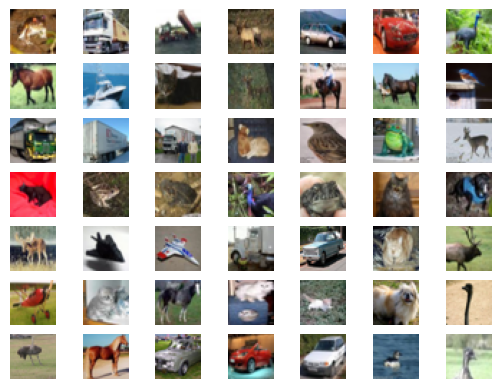

In [ ]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
(X_train,y_train),(X_test, y_test) = load_data()

# plot images from the training dataset
for i in range(49):
  pyplot.subplot(7, 7, 1 + i)
  pyplot.axis('off')
  pyplot.imshow(X_train[i])
pyplot.show()

In [ ]:
print(X_train.shape)

(50000, 32, 32, 3)


Defining the discriminator model

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU
from tensorflow.keras.utils import plot_model
import numpy as np

Standalone discriminator model

In [ ]:
def define_discriminator(in_shape=(32,32,3)):
  model = Sequential()
  # normal
  model.add(Conv2D(64, (3, 3), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(128, (3, 3), strides=(2,2), padding ='same'))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(256, (3 ,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(256, (3 ,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # classifier
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 964,993 (3.68 MB)

 Trainable params: 964,993 (3.68 MB)

 Non-trainable params: 0 (0.00 B)

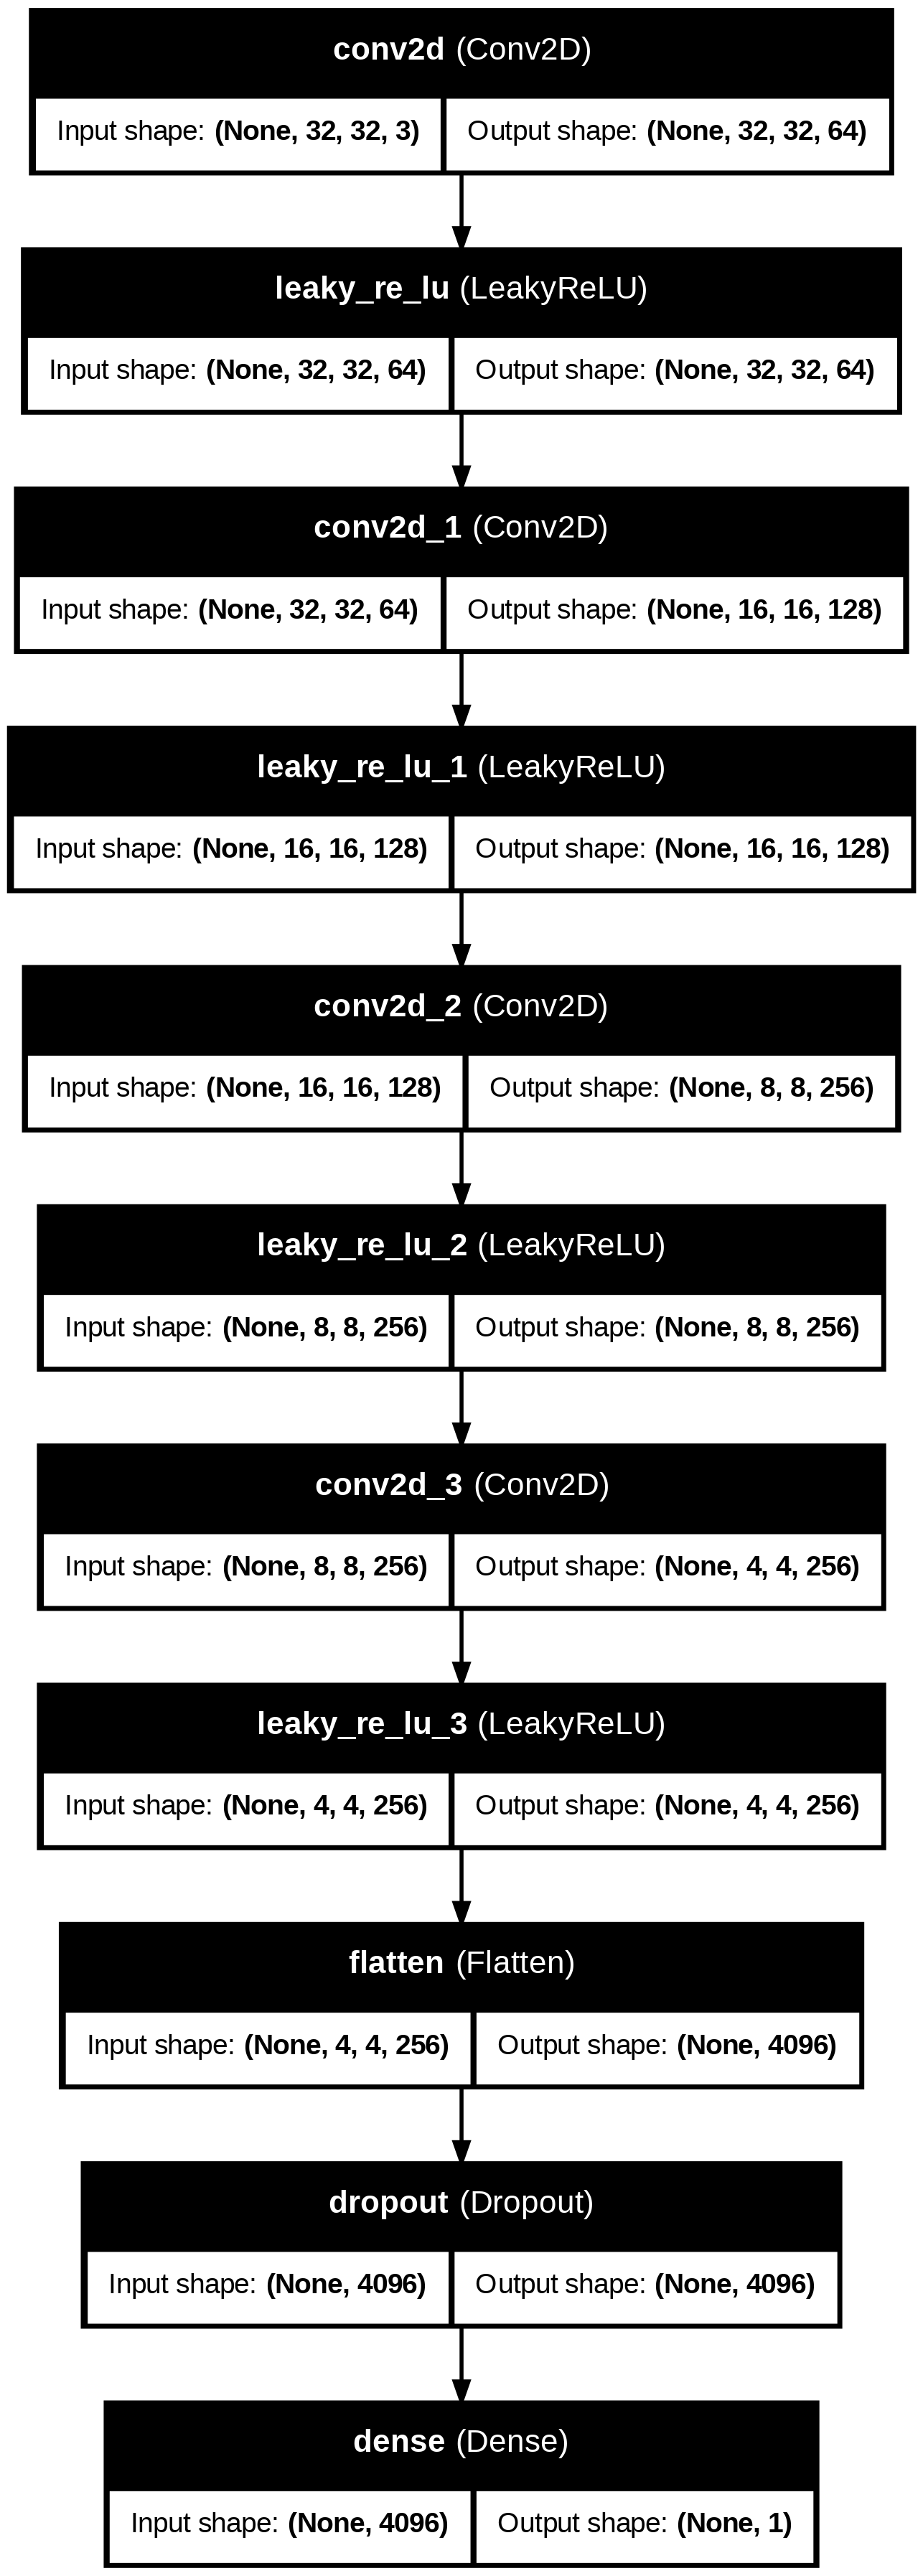

In [ ]:
# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png',show_shapes=True, show_layer_names=True)

In [ ]:
# Function to load the dataset and scale it
# Load and prepare cifar10 training images
def load_real_samples():
  # load cifar10 dataset
  (X_train, _), (_, _) = load_data()
  # convert from unsigned ints to floats
  X = X_train.astype('float32')
  # scale from [0, 255] to [-1, 1]
  X = (X - 127.5) / 127.5
  return X

In [ ]:
X = load_real_samples()
print(X.shape)
print(X[0])

(50000, 32, 32, 3)
[[[-0.5372549  -0.5137255  -0.5058824 ]
  [-0.6627451  -0.6392157  -0.64705884]
  [-0.60784316 -0.62352943 -0.6627451 ]
  ...
  [ 0.23921569  0.03529412 -0.15294118]
  [ 0.19215687 -0.01960784 -0.2       ]
  [ 0.16078432 -0.02745098 -0.19215687]]

 [[-0.8745098  -0.84313726 -0.84313726]
  [-1.         -1.         -1.        ]
  [-0.85882354 -0.9372549  -1.        ]
  ...
  [-0.03529412 -0.30980393 -0.5686275 ]
  [-0.06666667 -0.34901962 -0.60784316]
  [-0.04313726 -0.31764707 -0.5529412 ]]

 [[-0.8039216  -0.8117647  -0.8352941 ]
  [-0.8745098  -0.94509804 -1.        ]
  [-0.6156863  -0.7882353  -0.9372549 ]
  ...
  [-0.07450981 -0.34117648 -0.60784316]
  [-0.05882353 -0.34117648 -0.60784316]
  [-0.14509805 -0.42745098 -0.67058825]]

 ...

 [[ 0.6313726   0.33333334 -0.24705882]
  [ 0.5764706   0.2        -0.73333335]
  [ 0.5529412   0.2627451  -0.79607844]
  ...
  [ 0.25490198  0.04313726 -0.4509804 ]
  [-0.56078434 -0.75686276 -0.94509804]
  [-0.58431375 -0.7333333

In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
  # choose random instances
  ix = np.random.randint(0, dataset.shape[0], n_samples)
  # retrieve selected images
  X = dataset[ix]
  # generate real class labels (1)
  y = np.ones((n_samples,1))
  return X, y

In [ ]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
  # generate uniform random numbers in [0, 1]
  X = np.random.rand(32 * 32 * 3 * n_samples)
  # update to have the range [-1, 1]
  X = -1 + X * 2
  # reshape into a batch of color images
  X = X.reshape((n_samples, 32, 32, 3))
  # generate 'fake' class labels (0)
  y = np.zeros((n_samples, 1))
  return X, y

In [ ]:
X, y = generate_fake_samples(64)
print(X.shape)
print(y.shape)
print(y)

(64, 32, 32, 3)
(64, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


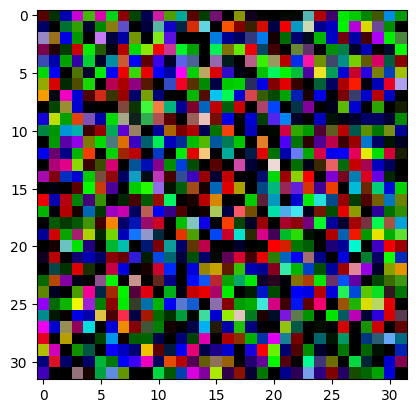

In [ ]:
import matplotlib.pyplot as plt
pyplot.imshow(X[0])

In [ ]:
# train the discriminator model temporarily
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_iter):
    # get randomly selected 'real' samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    # update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real, y_real)
    # generate 'fake' examples
    X_fake, y_fake = generate_fake_samples(half_batch)
    # update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    # summarize performance
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [ ]:
# Example training

# define the disciminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


>1 real=47% fake=23%
>2 real=49% fake=37%
>3 real=49% fake=43%
>4 real=51% fake=55%
>5 real=59% fake=62%
>6 real=66% fake=68%
>7 real=70% fake=72%
>8 real=74% fake=75%
>9 real=76% fake=78%
>10 real=79% fake=80%
>11 real=81% fake=81%
>12 real=82% fake=83%
>13 real=84% fake=84%
>14 real=85% fake=85%
>15 real=86% fake=86%
>16 real=87% fake=87%
>17 real=87% fake=88%
>18 real=88% fake=88%
>19 real=89% fake=89%
>20 real=89% fake=90%


In [ ]:
from keras import Sequential
from keras.layers import Dense, Reshape, Conv2DTranspose, Conv2D, LeakyReLU
from tensorflow.keras.utils import plot_model

In [ ]:
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 4x4 image
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	# upsample to 8x8
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 32x32
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# output layer
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 4096)                │         413,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 3)           │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

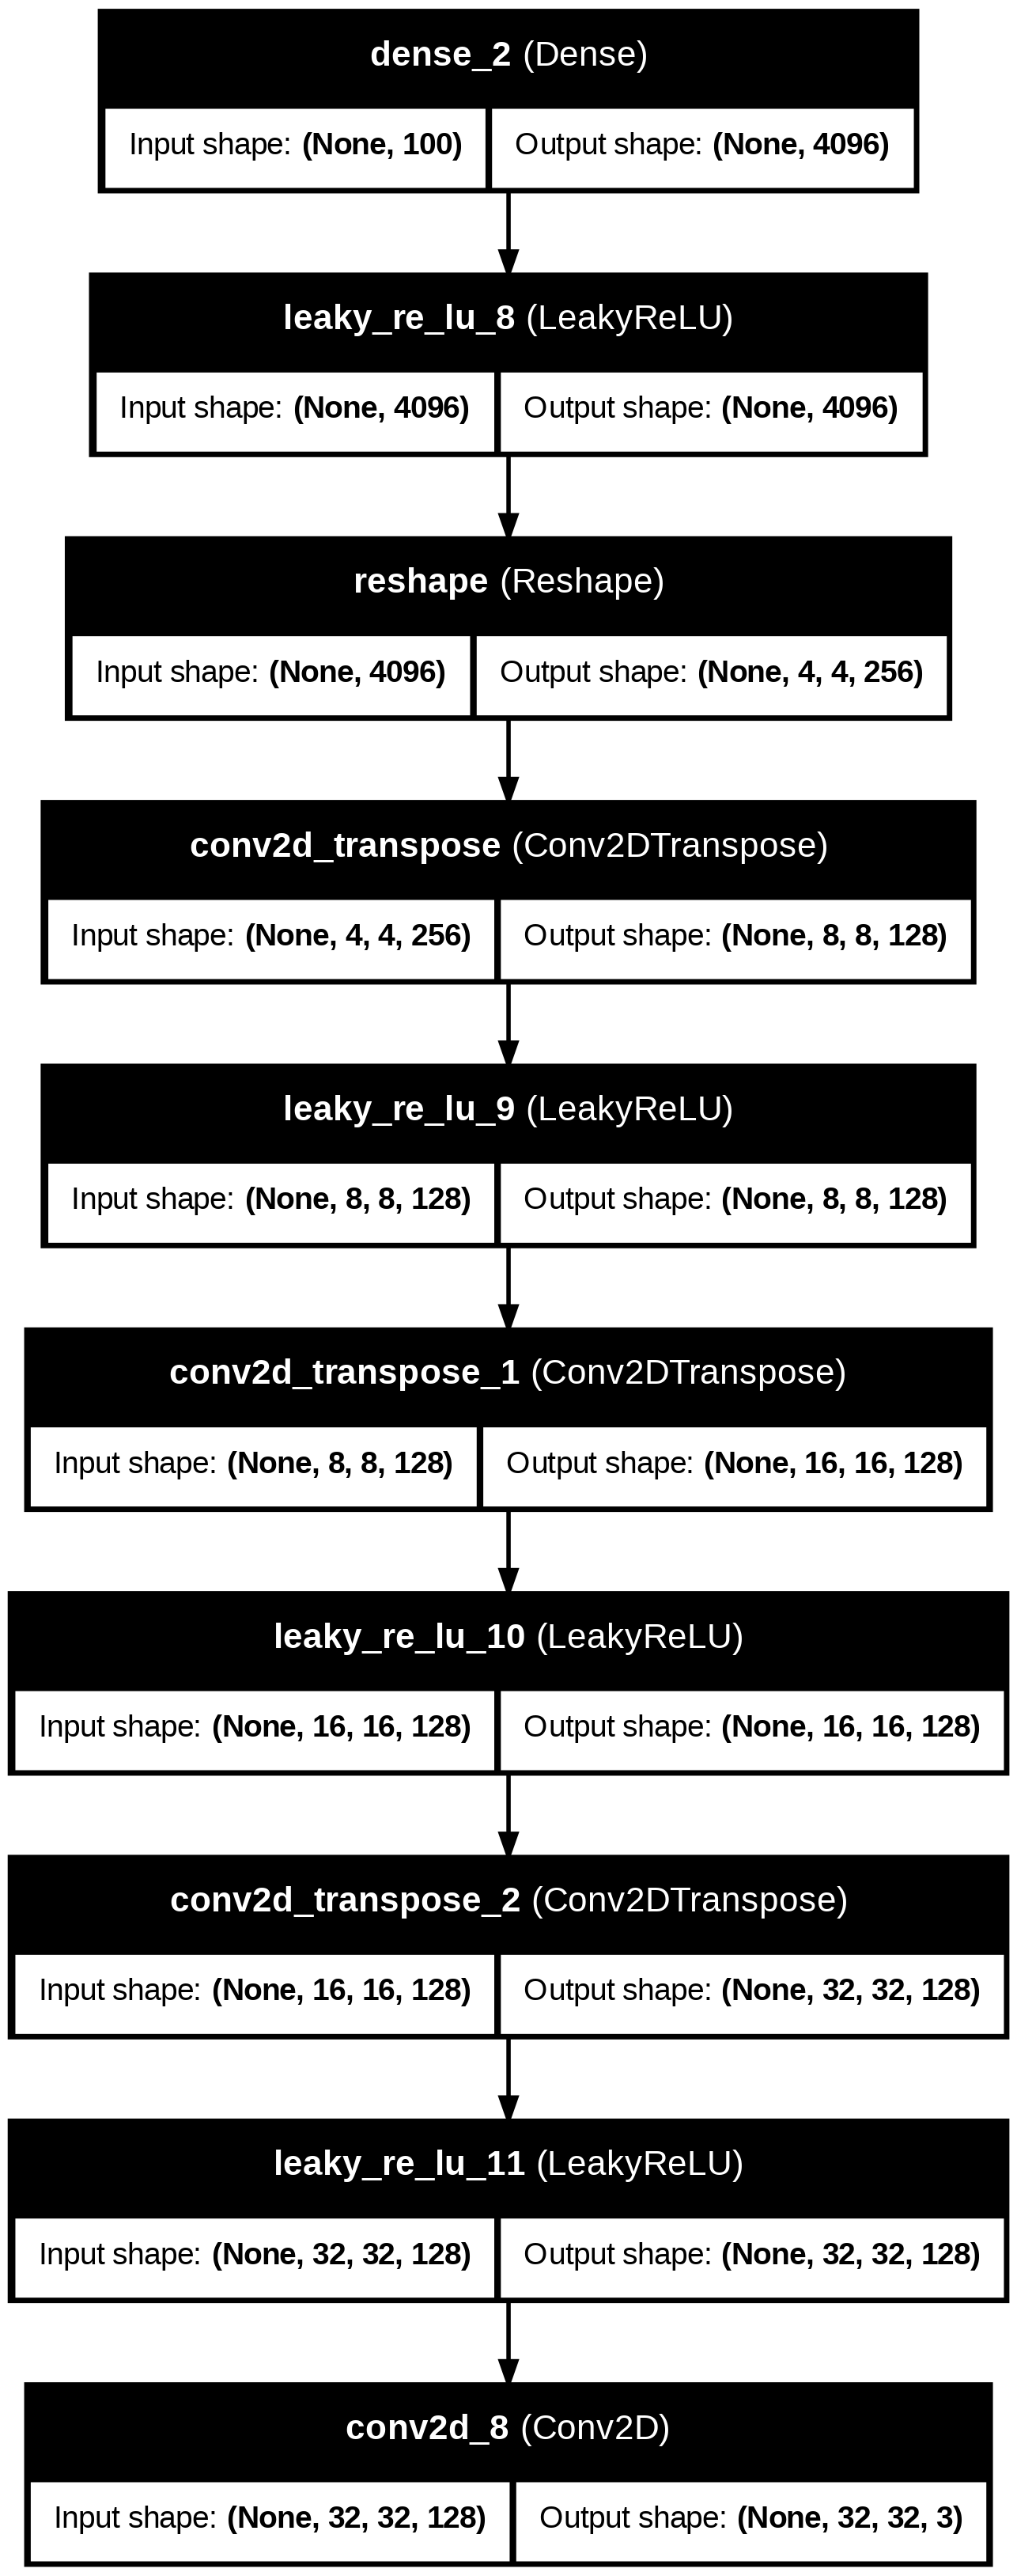

In [ ]:
# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True,show_layer_names=True)

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [ ]:
x_input = generate_latent_points(100,64)
print(x_input.shape)

(64, 100)


In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = np.zeros((n_samples, 1))
	return X, y

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


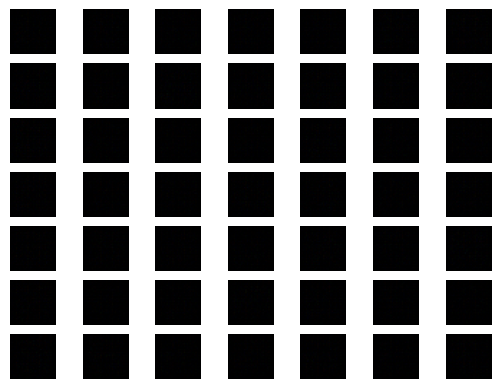

In [ ]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 49
X, _= generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
  # define subplot
  pyplot.subplot(7, 7, 1+i)
  # turn off axis labels
  pyplot.axis('off')
  # plot single image
  pyplot.imshow(X[i])
# show the figure
pyplot.show()

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 32, 32, 3)           │       1,466,115 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 1)                   │         964,993 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,431,108 (9.27 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 964,993 (3.68 MB)

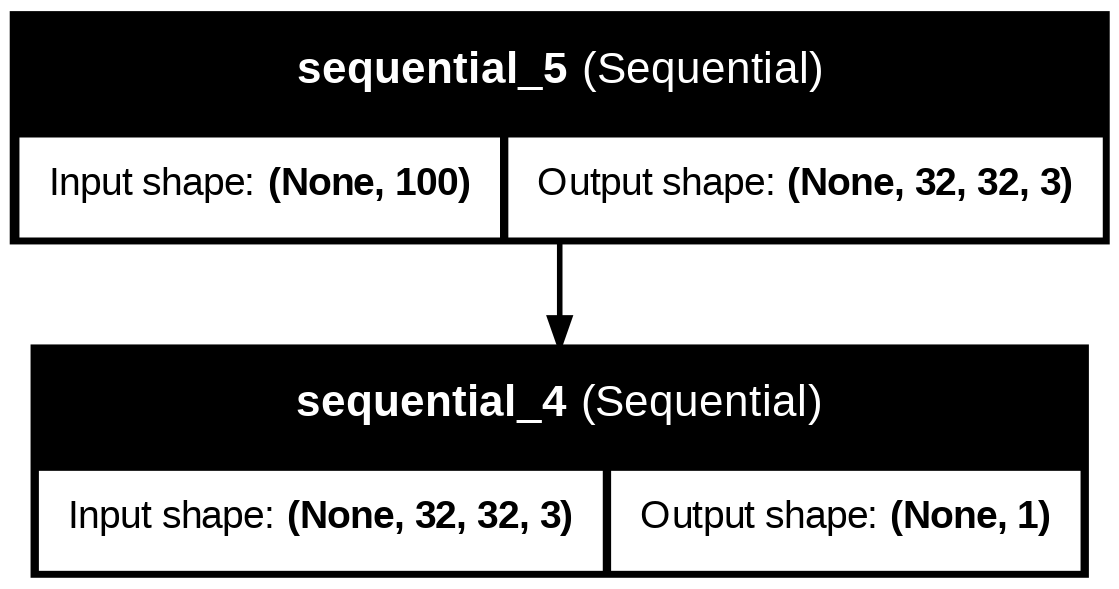

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = np.ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch+1)
	g_model.save(filename)

In [ ]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i])
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

In [ ]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128)

Streaming output truncated to the last 5000 lines.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
>4, 232/390, d1=1.073, d2=1.073 g=0.279
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>4, 233/390, d1=1.073, d2=1.073 g=0.279
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>4, 234/390, d1=1.073, d2=1.073 g=0.279
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
>4, 235/390, d1=1.073, d2=1.074 g=0.279
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>4, 236/390, d1=1.073, d2=1.074 g=0.279
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>4, 237/390, d1=1.073, d2=1.074 g=0.279
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>4, 238/390, d1=1.073, d2=1.074 g=0.279
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>4, 239/390, d1=1.073, d2=1.074 g=0.279
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>4, 240/390, d1=1.073, d2=1.074 g=0.279
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>4, 241/390, d1=1.074, d2=1.074 g=0.279
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
>4, 242/390, d1=1.074, d2=1.074 g=0.279
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>4, 243/390, d1=1.074, d2=1.074 g=0.279
2/2 ━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
>11, 1/390, d1=1.400, d2=1.465 g=0.248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
>11, 2/390, d1=1.325, d2=1.381 g=0.248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
>11, 3/390, d1=1.291, d2=1.339 g=0.248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
>11, 4/390, d1=1.273, d2=1.314 g=0.248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
>11, 5/390, d1=1.262, d2=1.296 g=0.248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
>11, 6/390, d1=1.253, d2=1.283 g=0.248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
>11, 7/390, d1=1.247, d2=1.274 g=0.248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
>11, 8/390, d1=1.242, d2=1.267 g=0.248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
>11, 9/390, d1=1.239, d2=1.261 g=0.248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>11, 10/390, d1=1.235, d2=1.257 g=0.248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
>11, 11/390, d1=1.233, d2=1.252 g=0.248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
>11, 12/390, d1=1.231, d2=1.249 g=0.248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
>11, 13/390, d1=1.229, d2=1.245 g=0